In [1]:
import numpy as np
import pandas as pd

In [2]:
df_data = pd.read_csv('Data_Science_Topics_Survey.csv')
df_data.drop(['Timestamp'], axis = 1, inplace = True)
df_data.rename(columns={"What's your level of interest for the following areas of Data Science? [Data Visualization]":'Data Visualization', "What's your level of interest for the following areas of Data Science? [Machine Learning]":'Machine Learning', "What's your level of interest for the following areas of Data Science? [Data Analysis / Statistics]":'Data Analysis / Statistics', "What's your level of interest for the following areas of Data Science? [Big Data (Spark / Hadoop)]":'Big Data (Spark / Hadoop)', "What's your level of interest for the following areas of Data Science? [Data Journalism]":'Data Journalism', "What's your level of interest for the following areas of Data Science? [Deep Learning]":'Deep Learning'}, inplace = True)

df_data.head()

,Data Visualization,Machine Learning,Data Analysis / Statistics,Big Data (Spark / Hadoop),Data Journalism,Deep Learning
0,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested
3,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Very interested
4,Somewhat interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested


In [3]:
dt_f = df_data.apply(pd.value_counts).transpose()
dt_f

,Not interested,Somewhat interested,Very interested
Data Visualization,102,734,1340
Machine Learning,74,477,1629
Data Analysis / Statistics,60,444,1688
Big Data (Spark / Hadoop),127,729,1332
Data Journalism,610,1081,429
Deep Learning,136,770,1263


In [4]:
dt_f.sort_index(axis = 1, level = 'Very interested', inplace = True, ascending = False)
dt_f.sort_values(by='Very interested', ascending=False, inplace = True)
dt_f

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

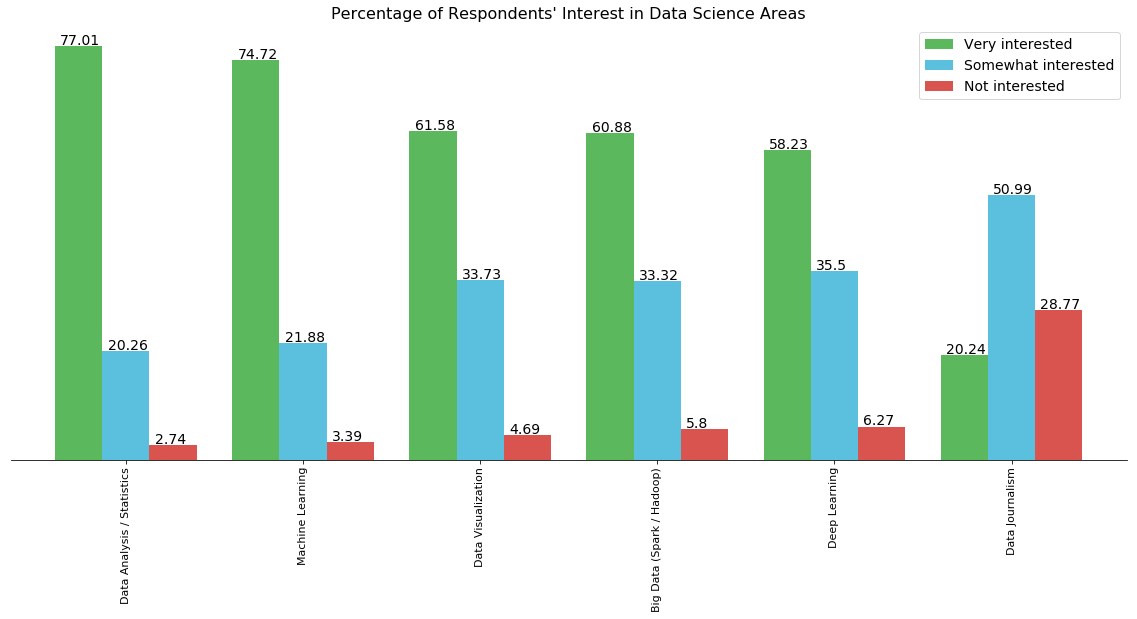

In [6]:
ax = dt_f.plot(kind='bar', 
          figsize = (20, 8), 
          width = 0.8, 
          color = ('#5cb85c', '#5bc0de', '#d9534f'), 
          linewidth=0, 
          edgecolor='white'
        )

tt = "Percentage of Respondents' Interest in Data Science Areas"
ax.set_title(tt, fontsize=16)

ax.set_xticklabels(['Data Analysis / Statistics', 'Machine Learning', 'Data Visualization', 'Big Data (Spark / Hadoop)', 'Deep Learning', 'Data Journalism'], fontsize=11)
plt.legend(fontsize = 14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)

totals = []

for i in ax.patches:
    totals.append(i.get_height())

tem = []
for i in range(0, 6):
    tem.append(totals[i] + totals[i + 6] + totals[i + 12])

j = 0
for i in ax.patches:
    if j == 6:
        j = 0
    t = round((i.get_height() / tem[j])*100, 2)
    ax.text(i.get_x() + 0.03, i.get_height() + 5, str(t), fontsize = 14, color='black')
    j += 1